# Basic classification in TensorFlow/Keras

Based on:
https://www.tensorflow.org/tutorials/keras/basic_classification
and
https://elitedatascience.com/keras-tutorial-deep-learning-in-python

## 0. Install TensorFlow and Keras

TensorFlow is an open source machine learning framework created by Google.
Keras is a high-level API to build and train models in TensorFlow used in this tutorial.

### 0.1. Install TensorFlow and Keras with Anaconda3:

pip install tensorflow
pip install keras

### 0.2. TensorFlow and Python3 compatibility issues

(As of November, 2018) Anaconda3 is supplied with Python 3.7, unfortunately Tensorflow is not ready yet for that, and TensorFlow installation would fail.
You should downgrade to Python 3.5 and then reinstall TensorFlow+Keras:

conda install python=3.5.0

pip install tensorflow
pip install keras

## 1. Prepare the workspace and obtain+preprocess MNIST data

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout, Convolution2D, MaxPooling2D
from keras.utils import to_categorical # note will mean we need to change names
# from np_utils to to_categorical in some places


2.19.0
3.10.0


In [ ]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
# numpy version
print(f"numpy version: {np.__version__}")

numpy version: 2.0.2


In [ ]:
# Worked on
# TensorFlow version: 2.18.0
# Keras version: 3.8.0
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.19.0
Keras version: 3.10.0


MNIST dataset: 70,000 images of decimal digits (0..9) in format 28x28:

https://en.wikipedia.org/wiki/MNIST_database

![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b1/MNIST_dataset_example.png/640px-MNIST_dataset_example.png)

In [ ]:
# Import MNIST dataset split into 60,000 for training and 10,000 for testing
dset = keras.datasets.mnist
# here I unpack the data into 4 main parts
# we get two tuples which have two parts inside
# so we unpack the outer shell and unpack the inner parts as well
(train_images, train_labels), (test_images, test_labels) = dset.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(dset) # so module which is very general we need the actual data


module

In [ ]:
# I could download data again as a single unit into a single variable and then split later
alldata = dset.load_data()

In [ ]:
type(alldata)

tuple

In [ ]:
len(alldata), type(alldata[0])

(2, tuple)

In [ ]:
# so first item of first subitem in alldata should be equal to train_images
alldata[0][0] == train_images

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [ ]:
# our components are ndarray types of possibly multiple dimensions
# we expect 60 000 items and we expect 28 x 28 size each
train_images.shape

(60000, 28, 28)

In [ ]:
# let's see the first one
train_images[0].shape

(28, 28)

In [ ]:
# so let's see the first image
# now Colab automatically shows the image, it used to be that we needed extra code
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
# so ground truth for first image in our training set
train_labels[0]

np.uint8(5)

In [ ]:
# let's see the actual data in the train_images[0]
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
type(train_images) # so underlaying structure is numpy numeric data array

numpy.ndarray

In [ ]:
train_images[:2] # first two images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0].dtype

dtype('uint8')

In [ ]:
# uint8 means 8 bit integer unsigned so means possible 2 to the power 8 different values
2**8

256

In [ ]:
256**3 # we get 16 million colors

16777216

In [ ]:
2**32

4294967296

In [ ]:
# How many colors can RGB with 3 bytes hold
256*256*256

16777216

In [ ]:
# we see ads with 10 bit color as well
# so each color gets 2^10 == 1024 values instead of usual 8 bit
(2**10)**3

1073741824

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
28**2

784

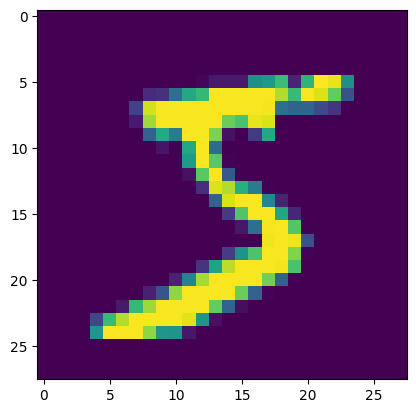

In [ ]:
# Insight into imported data
num = 0
plt.imshow(train_images[num]) # so matplotlib imshow understands matrices and shows images, the color scaled can be set in setting somewhere

In [ ]:
train_labels[0]

5

5
0
4
1
9


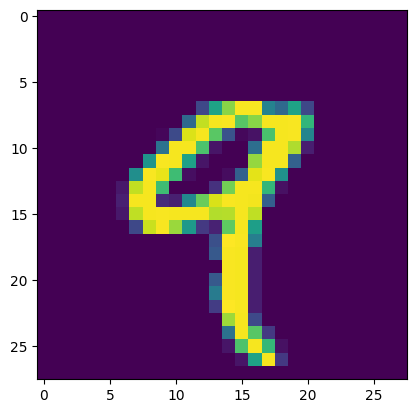

In [ ]:
for n in range(5):
  plt.imshow(train_images[n])
  print(train_labels[n])

In [ ]:
28*28

784

In [ ]:
num

0

In [ ]:
print(train_images[num])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
train_images[2][np.argmax(train_images[2], axis=1)]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
# what is the maximum value in our input features?
# it should be max of 2^8 - 1 because we start values from 0
np.amax(train_images), 2**8-1

(np.uint8(255), 255)

In [ ]:
np.amin(train_images)

np.uint8(0)

In [ ]:
train_images.dtype

dtype('uint8')

In [ ]:
a = np.array([126,127,128,129], dtype='uint8')
a

array([126, 127, 128, 129], dtype=uint8)

In [ ]:
b = a.astype('int8')
b

array([ 126,  127, -128, -127], dtype=int8)

In [ ]:
c = np.array([254,255,256,257], dtype='uint64')
c

array([254, 255, 256, 257], dtype=uint64)

In [ ]:
d = c.astype('uint8')
d

array([254, 255,   0,   1], dtype=uint8)

In [ ]:
e = c.astype('int8')
e

array([-2, -1,  0,  1], dtype=int8)

In [ ]:
f = np.array([1,3,35,25,25,25])
f

array([ 1,  3, 35, 25, 25, 25])

In [ ]:
f.dtype

dtype('int64')

## Learning about our ground truth labels

In [ ]:
print(train_images[num].shape)

(28, 28)


In [ ]:
print(train_labels[num])

5


In [ ]:
print(train_labels[:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [ ]:
# let's see what our max label is
# it should be 9 in this case
np.amax(train_labels)

np.uint8(9)

In [ ]:
# again we expect the minimum to be 0
np.amin(train_labels)

np.uint8(0)

In [ ]:
# let's double check that all digits are represented here
# faster than built in set
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# let's add assert test that checks that all 10 digits are present labels
assert len(np.unique(train_labels)) == 10
# even better let's compare with actual numbers
assert np.amax(train_labels) == 9
# and min
assert np.amin(train_labels) == 0
print("Our training labels are good to go")
print(f"Max label: {np.amax(train_labels)}")
print(f"Min label: {np.amin(train_labels)}")

Our training labels are good to go
Max label: 9
Min label: 0


In [ ]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
# Categorize labels (not mandatory for our first simple network)
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)
# to_categorical function creates binary class matrix so 0 or 1

In [ ]:
train_labels[0]

np.uint8(5)

In [ ]:
train_labels_cat[0] # so here we have 100% sure ground truth
#theoretically we could also represent our ground truth as multiple possible values with probabilities using this type of vector

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
print(train_labels[num], train_labels_cat[num])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print(test_labels[0], test_labels_cat[0])

7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
np.max(test_images)

np.uint8(255)

In [ ]:
np.min(test_images)

np.uint8(0)

## Preprocessing

Most Neural Networks work with floating point values

Here we have integers from 0 to 255

We convert them to floating point value from 0 to 1 by dividing ALL values by 255

In [ ]:
# Preprocess image data # we need to have data fit in floating range between 0 and 1
test_images_orig = test_images # this is not a copy FIXME!
train_images = train_images / 255 # so like a loop that goes through all the values in train_images and each one is divided 255
test_images = test_images / 255
# here i do not have the original image integers any more
# but I can always download them again from the start

In [ ]:
np.max(train_images) # make sure we did it right and max is not over 1

np.float64(1.0)

In [ ]:
np.mean(train_images)
# how to interpet this value?

# HINT 0 is black , and 1 would be white now.

np.float64(0.1306604762738429)

0


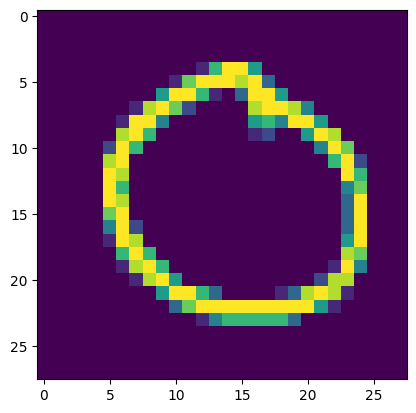

In [ ]:
num = 68
print(train_labels[num])
plt.imshow(train_images[num])

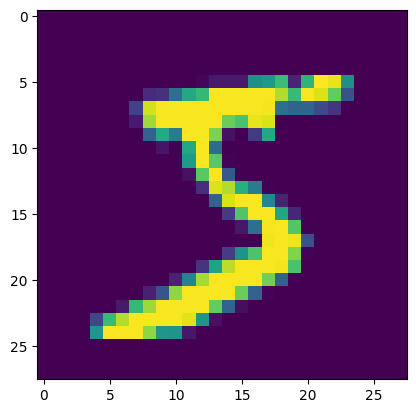

In [ ]:
plt.imshow(train_images[0]) # so scaling worked

In [ ]:
print(train_images[num])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## 2. Create, train and run model

### 2.1. Create simple model

We start with a simple model of 3 layers


![Simple NN](https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Neural_network_example.svg/500px-Neural_network_example.svg.png)

Src: https://en.wikipedia.org/wiki/Neural_network

In [ ]:
model = keras.Sequential() # we tell Keras that our model will be sequential
model.add(Flatten(input_shape=(28, 28))) # here we flatten the 28x28 matrix into a single vector
model.add(Dense(128, activation=tf.nn.relu))
# key idea behind activation is introduce nonlinearity
# https://en.wikipedia.org/wiki/Rectified_linear_unit
model.add(Dense(10, activation=tf.nn.softmax)) #how many different answers we need in the output layer
# we use softmax in the output layer to have total probability shown as 1 total
# https://en.wikipedia.org/wiki/Softmax_function
# we need 10 because we know we have 10 different digits

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 2.2. Compile model

In [ ]:
# we prepare our model (ANN) for work
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

### 2.3. Train model

In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
# the training happens here
model.fit(train_images, train_labels_cat, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8804 - loss: 0.4261
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9640 - loss: 0.1225
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9756 - loss: 0.0802
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9839 - loss: 0.0548
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9872 - loss: 0.0435
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9904 - loss: 0.0324
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9922 - loss: 0.0258
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9946 - loss: 0.0190
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9958 - loss: 0.0148
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9961 - loss: 0.0140


In [ ]:
# so batch size must be 32
60_000 / 1875

32.0

In [ ]:
# loss function is a way to measure performance of our model
# https://www.ibm.com/think/topics/loss-function

## 3. Test model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print(test_loss,test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0977
0.08315423876047134 0.9778000116348267


In [ ]:
type(model)

keras.src.models.sequential.Sequential

In [ ]:
# Print accuracy
print('Test accuracy:', test_acc)

Test accuracy: 0.9778000116348267


In [ ]:
10000 - 9779 # so we got 221 errors (false positives) out of 10k test images

221

In [ ]:
313*32 #o we have 313 batches of size 32 with last 313th batch being smaller

10016

In [ ]:
# Calculate prediction for test data
# here we can make our own predictions
# so this could be done in production as well, just feed the model images/features in the same format as training data
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


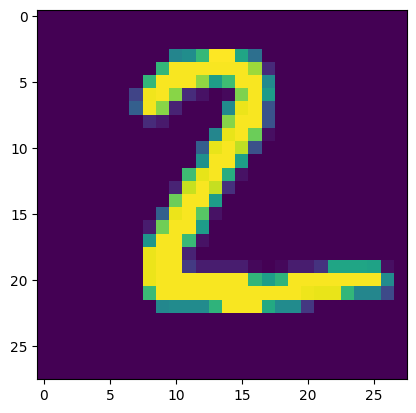

In [ ]:
# Check what is predicted
num = 1
plt.imshow(test_images[num])

In [ ]:
print(predictions[num])

[2.4231541e-12 4.2804697e-08 9.9999386e-01 5.5470206e-10 1.2553818e-18
 9.4324298e-11 1.8721873e-11 3.0317683e-18 6.0394764e-06 9.0533391e-16]


In [ ]:
predictions[num].sum() # everything except most likely case here is basically 0
# due to how softmax works

np.float32(0.99999994)

In [ ]:
# so which is the highest confidence in the prediction for this value?
np.amax(predictions[num])

np.float32(0.99999386)

In [ ]:
# so let's find the index of our highest prediction
np.where(predictions[num] == np.amax(predictions[num]))

(array([2]),)

In [ ]:
len(predictions)

10000

In [ ]:
# gets index of the largest value
print(np.argmax(predictions[num]))

2


## 4. Visualize results

### 4.1. Define auxiliary functions

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### 4.2. Plot prediction

In [ ]:
# class names just for visualization
class_names = ['0-zero', '1-one', '2-two', '3-three', '4-four',
               '5-five', '6-six', '7-seven', '8-eight', '9-nine']

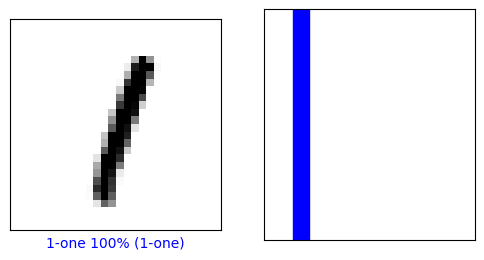

In [ ]:
# visualization of prediction of one image
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images_orig)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

### 4.3. More visualization

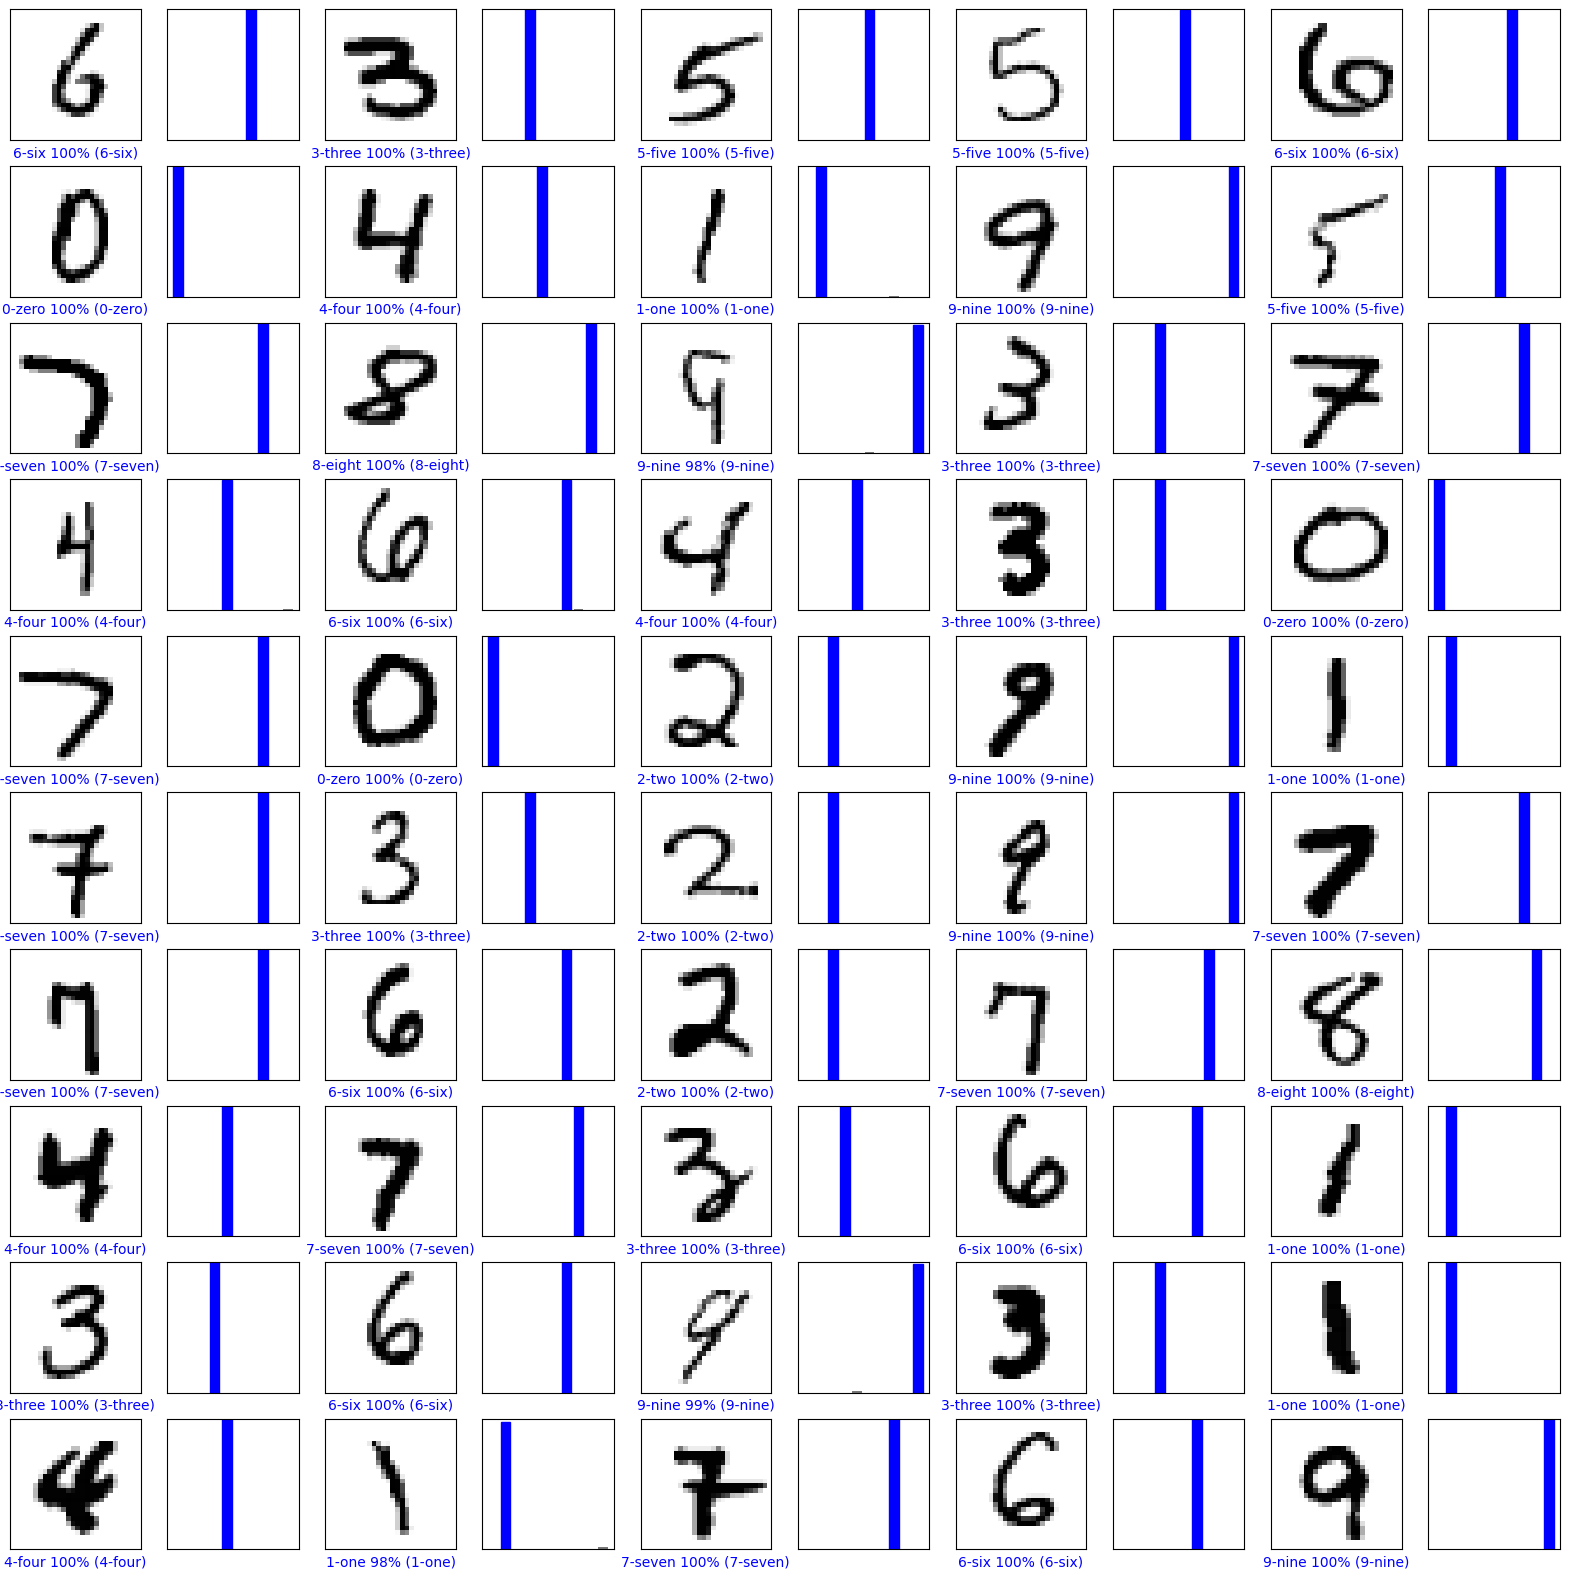

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+50, predictions, test_labels, test_images_orig)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+50, predictions, test_labels)

In [ ]:
def plot50(offset=0):
  # Plot the first X test images, their predicted label, and the true label
  # Color correct predictions in blue, incorrect predictions in red
  num_rows = 10
  num_cols = 5
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i+offset, predictions, test_labels, test_images_orig)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i+offset, predictions, test_labels)

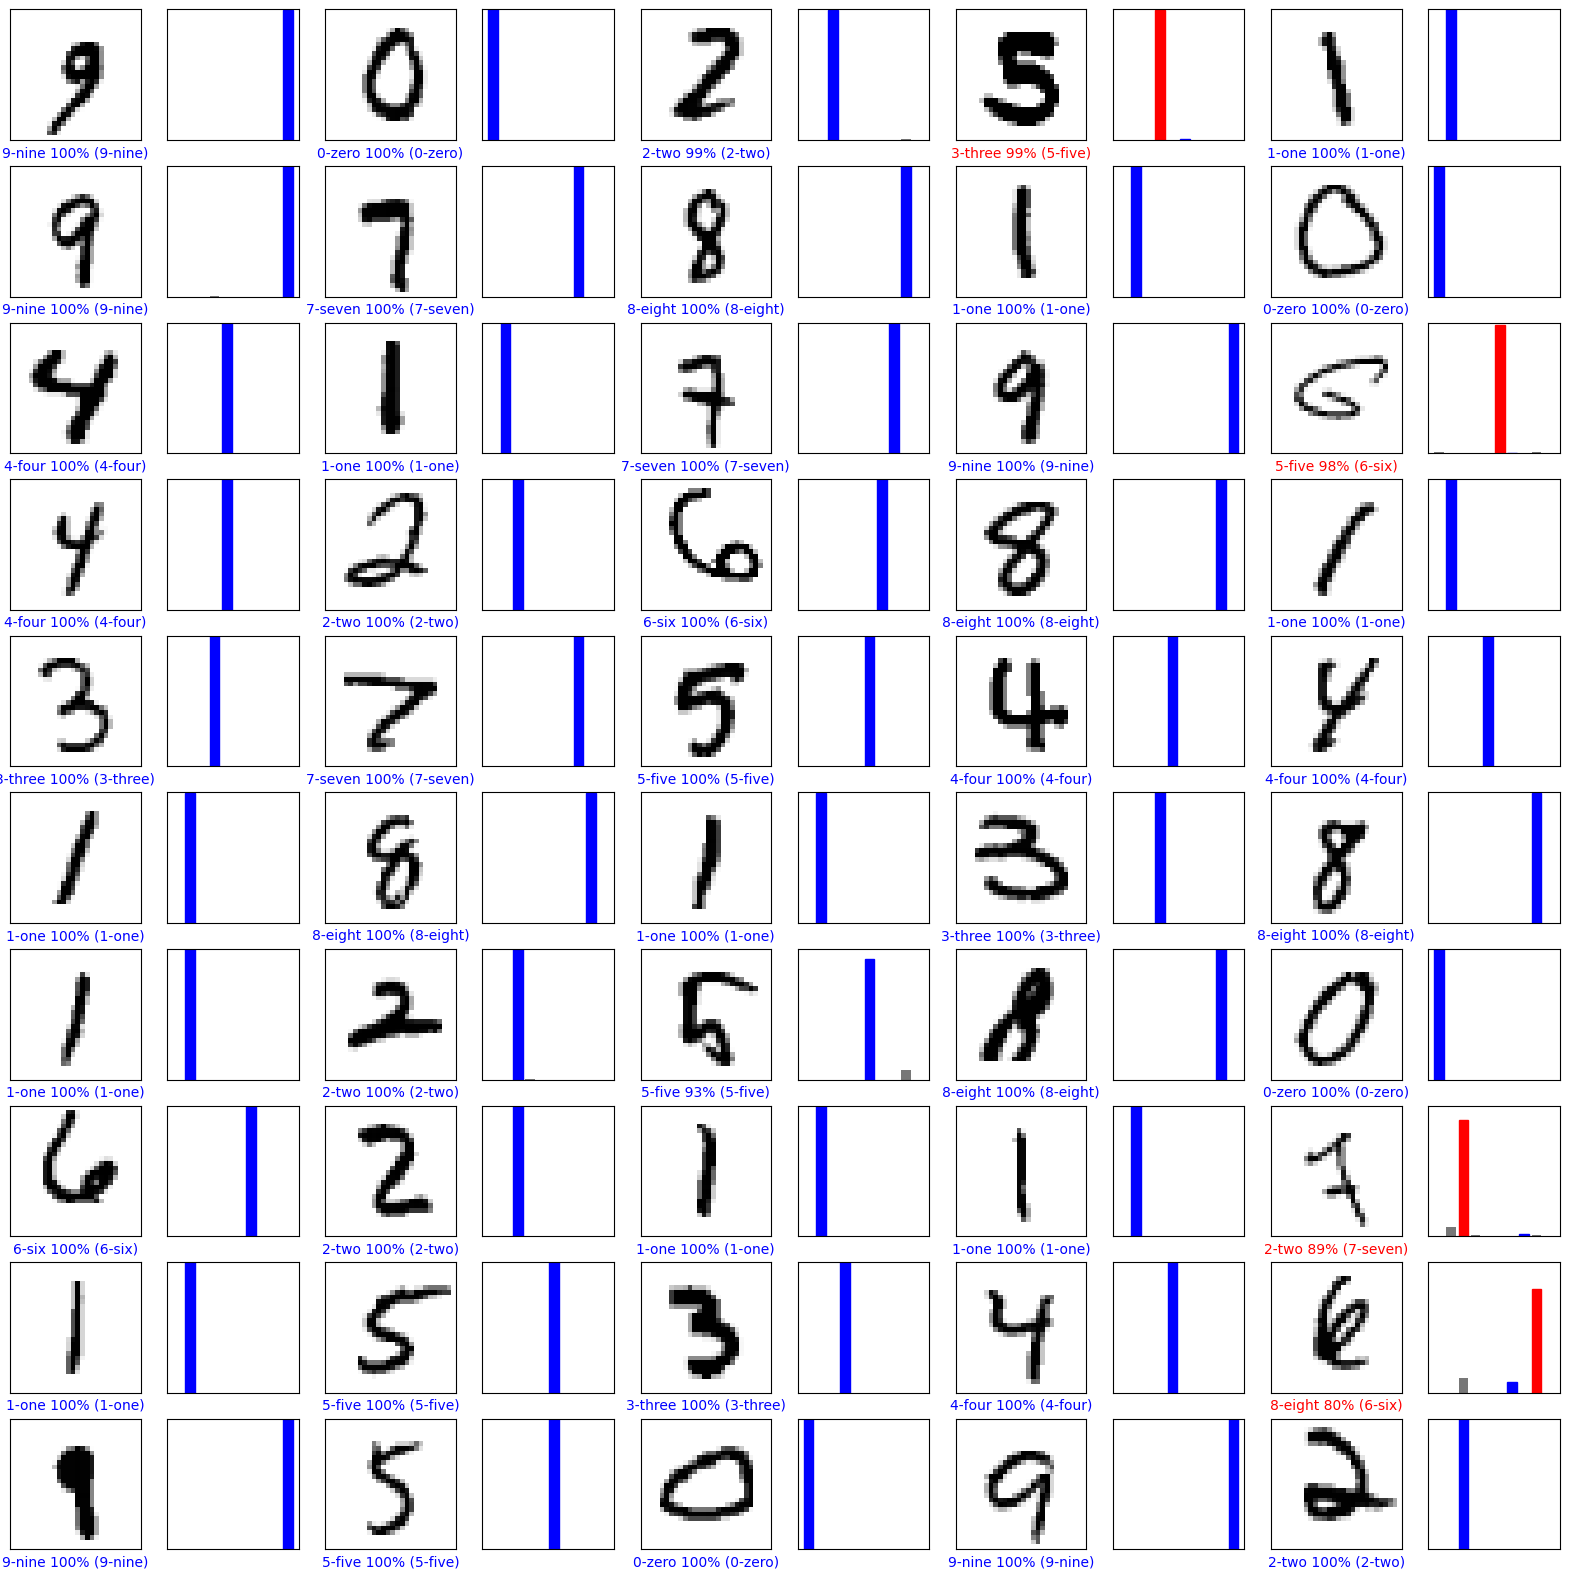

In [ ]:
plot50(1000)

In [ ]:
len(predictions), len(test_labels)

(10000, 10000)

In [ ]:
predictions[0]

array([2.16445750e-09, 2.23092616e-12, 2.18296634e-08, 3.28115348e-05,
       1.34914468e-14, 1.10772717e-10, 3.85334749e-13, 9.99967039e-01,
       1.36949865e-08, 9.35609350e-08], dtype=float32)

In [ ]:
np.argmax(predictions[0])

np.int64(7)

## Displaying all Errors

In [ ]:
# let's find index of all error images in our test set
errors = []
for i, el in enumerate(predictions):
  if np.argmax(el) != test_labels[i]:
    errors.append(i)
len(errors)

222

In [ ]:
10000-210

In [ ]:
errors[:5]

[149, 247, 259, 321, 340]

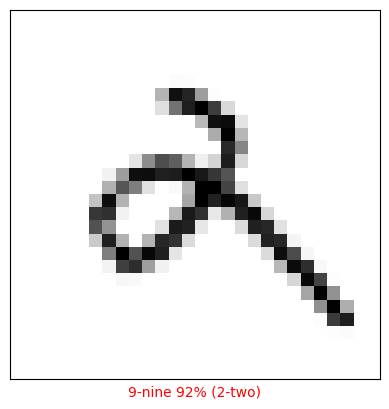

In [ ]:
plot_image(149, predictions, test_labels, test_images_orig)


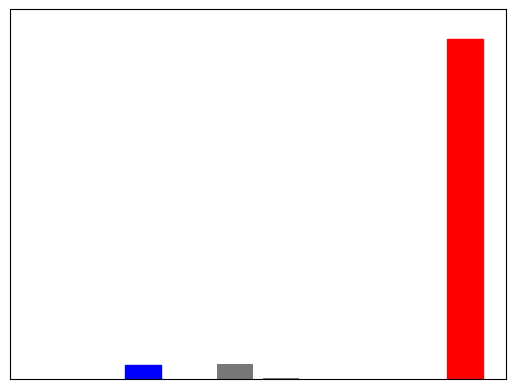

In [ ]:
plot_value_array(149, predictions, test_labels)

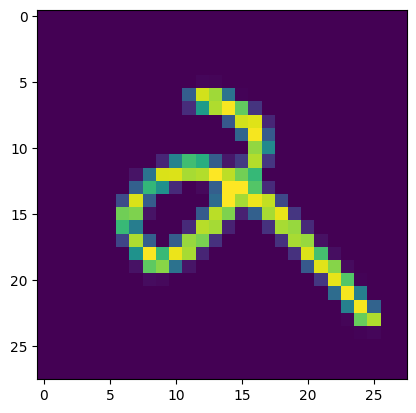

In [ ]:
plt.imshow(test_images_orig[149])

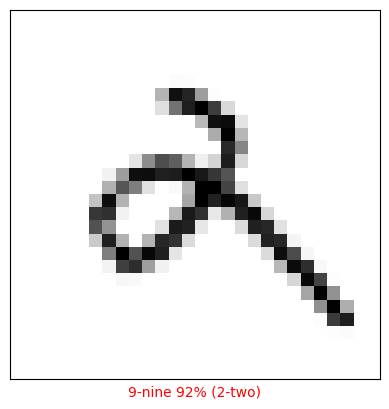

In [ ]:
# let's plot first error image
plot_image(errors[0], predictions, test_labels, test_images_orig)

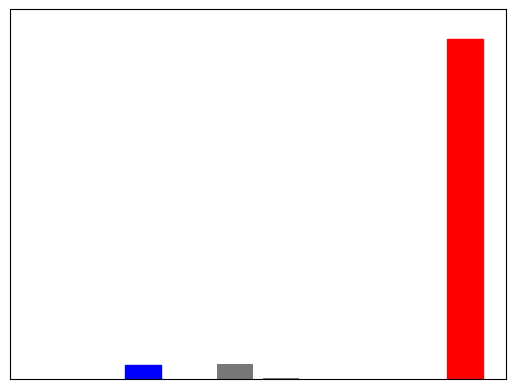

In [ ]:
plot_value_array(errors[0], predictions, test_labels)

In [ ]:
errors[:10a]

[149, 247, 259, 321, 340, 445, 582, 583, 659, 684]

In [94]:
# let's plot all errors we have the indexes saved in errors
def plot50_from_indexes(indexes):
  # Plot the first X test images, their predicted label, and the true label
  # Color correct predictions in blue, incorrect predictions in red
  num_rows = 10
  num_cols = 5
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for grid_i, i in enumerate(indexes):
      plt.subplot(num_rows, 2*num_cols, 2*grid_i+1)
      plot_image(i, predictions, test_labels, test_images_orig)
      plt.subplot(num_rows, 2*num_cols, 2*grid_i+2)
      plot_value_array(i, predictions, test_labels)

In [97]:
len(test_images_orig)

10000

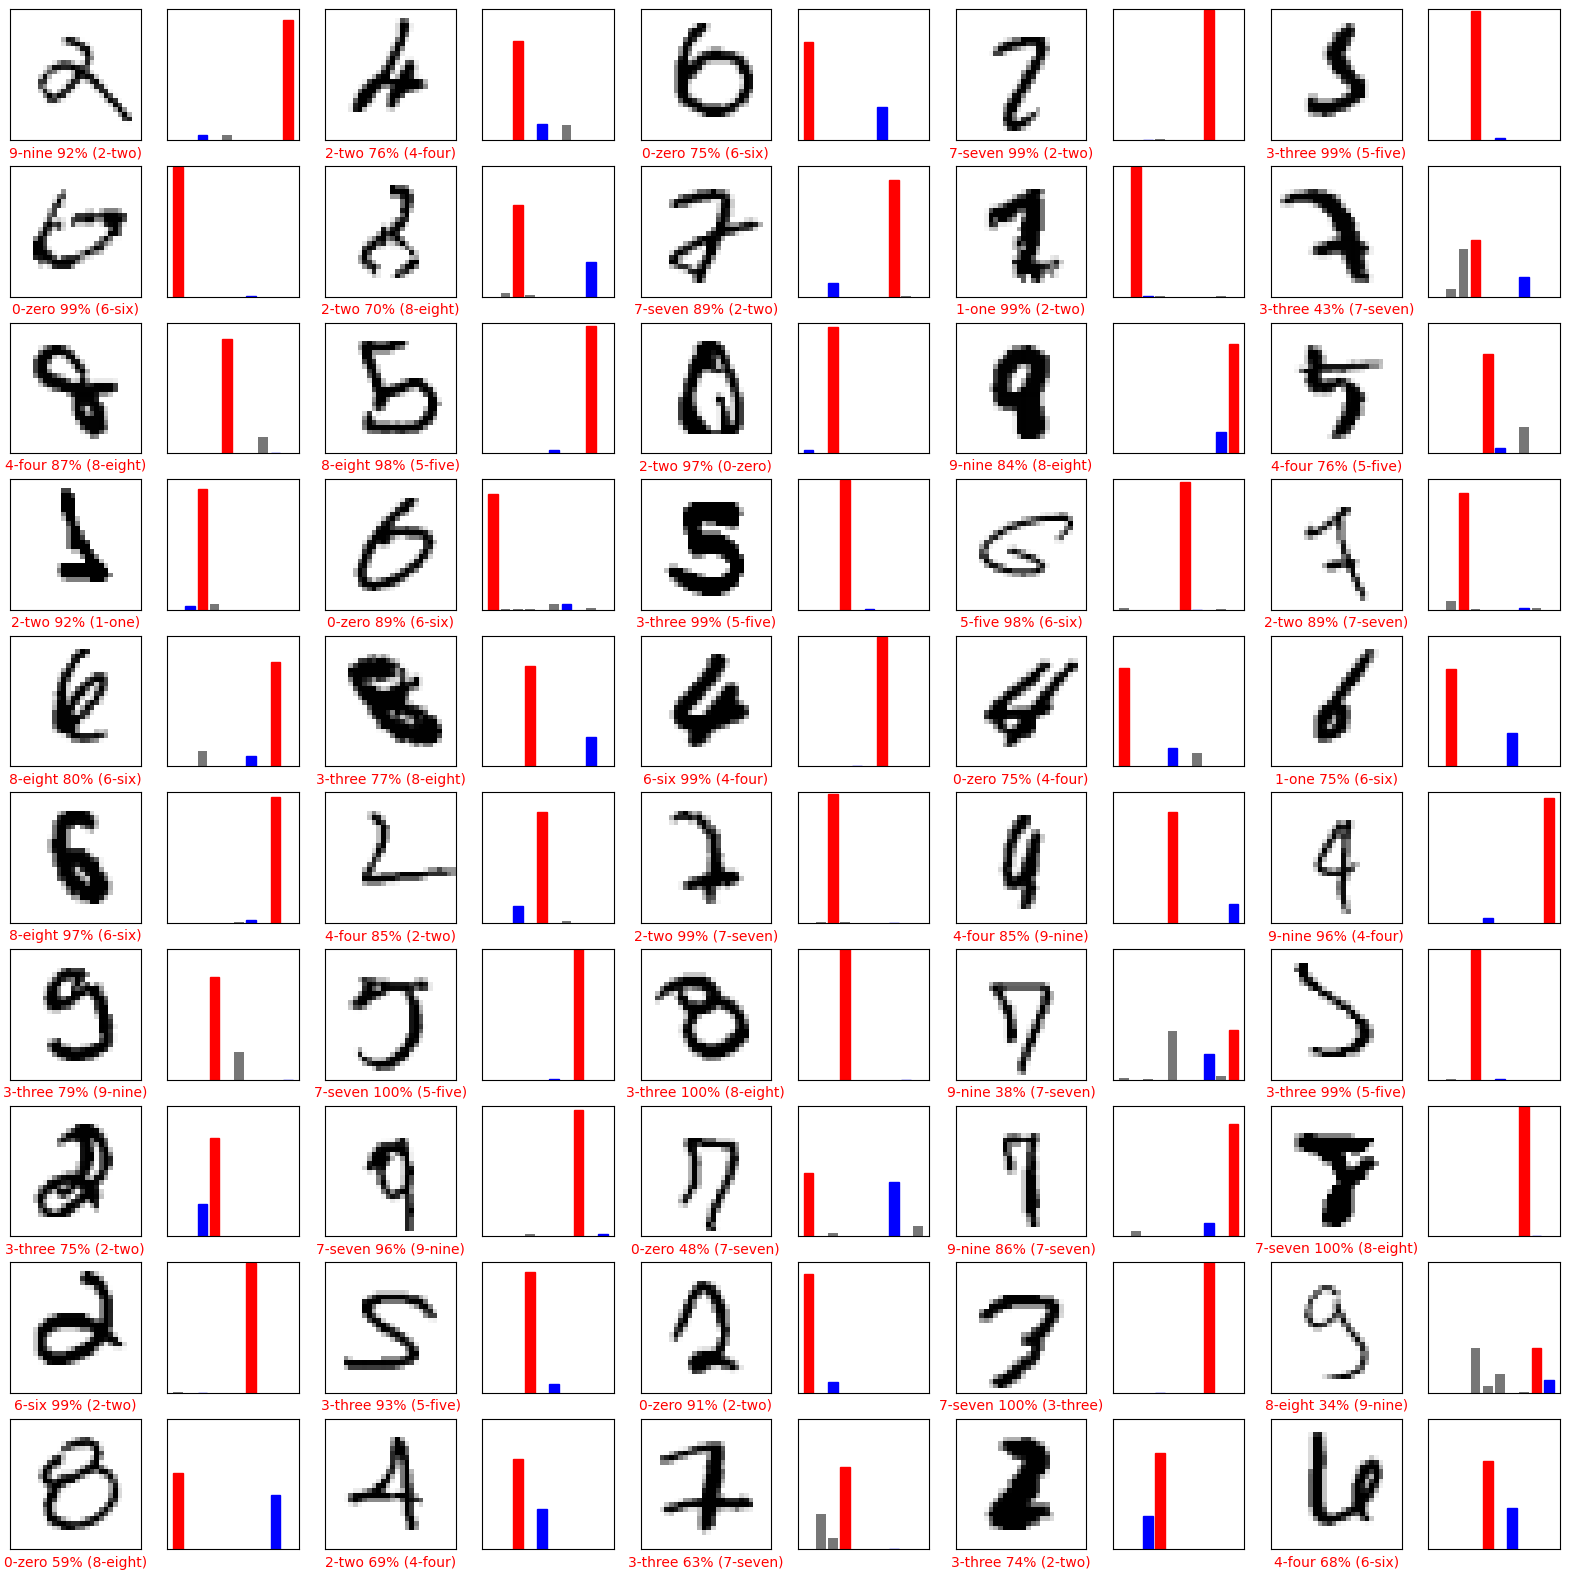

In [ ]:
# let's try it on errors
plot50_from_indexes(errors[:50])

## 5. Import, preprocess and train FASHION-MNIST

Fashion-MNIST is similar to MNIST but of clothings:
https://en.wikipedia.org/wiki/Fashion_MNIST

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


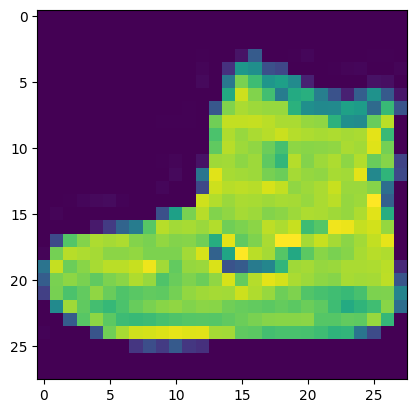

In [98]:
# Load data
# again this data is part of the keras library
dset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dset.load_data()
num = 0
plt.imshow(train_images[num])

In [99]:
train_labels[0]

np.uint8(9)

In [100]:
np.max(train_labels)

np.uint8(9)

In [101]:
len(train_images)

60000

In [102]:
np.amax(train_images)

np.uint8(255)

In [105]:
# Preprocess data
# we need categories - one hot encoded
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)
test_images_orig = test_images
# then convert images to floating point in range of 0 to 1 instead of 0 to 255
train_images = train_images / 255
test_images = test_images / 255

In [106]:
# Create and compile model
model = keras.Sequential() # blanket definition of model with nothing added yet
# we add layers
model.add(Flatten(input_shape=(28, 28))) # so first addition are the inputs (flattened here)
model.add(Dense(128, activation=tf.nn.relu)) # single middle layer
model.add(Dense(10, activation=tf.nn.softmax)) # output needs 10 boxes since we have 10 answers
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [107]:
# Train model and obtain predictions
# we add a few more epochs since this is a harder to learn image set
model.fit(train_images, train_labels_cat, epochs=15) # so the longest part the training is here in this fit
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print('Test accuracy:', test_acc)
# finally let's make predictions to all test_images
predictions = model.predict(test_images)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5403 - loss: 1.4660
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7651 - loss: 0.6484
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7966 - loss: 0.5627
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8126 - loss: 0.5232
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8257 - loss: 0.4932
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8347 - loss: 0.4666
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8401 - loss: 0.4529
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8440 - loss: 0.4380
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8463 - loss: 0.4373
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8514 - loss: 0.4233
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8546 - loss: 0.4087
Epoch 12/15
1875/1875 ━━━━━━━━

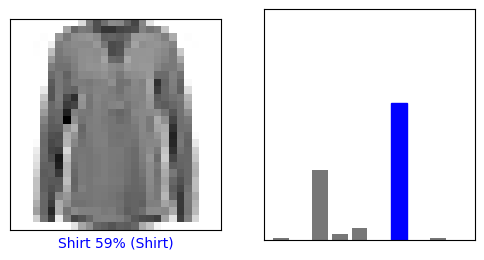

In [108]:
# Plot one prediction
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
i = 9004
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images_orig)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

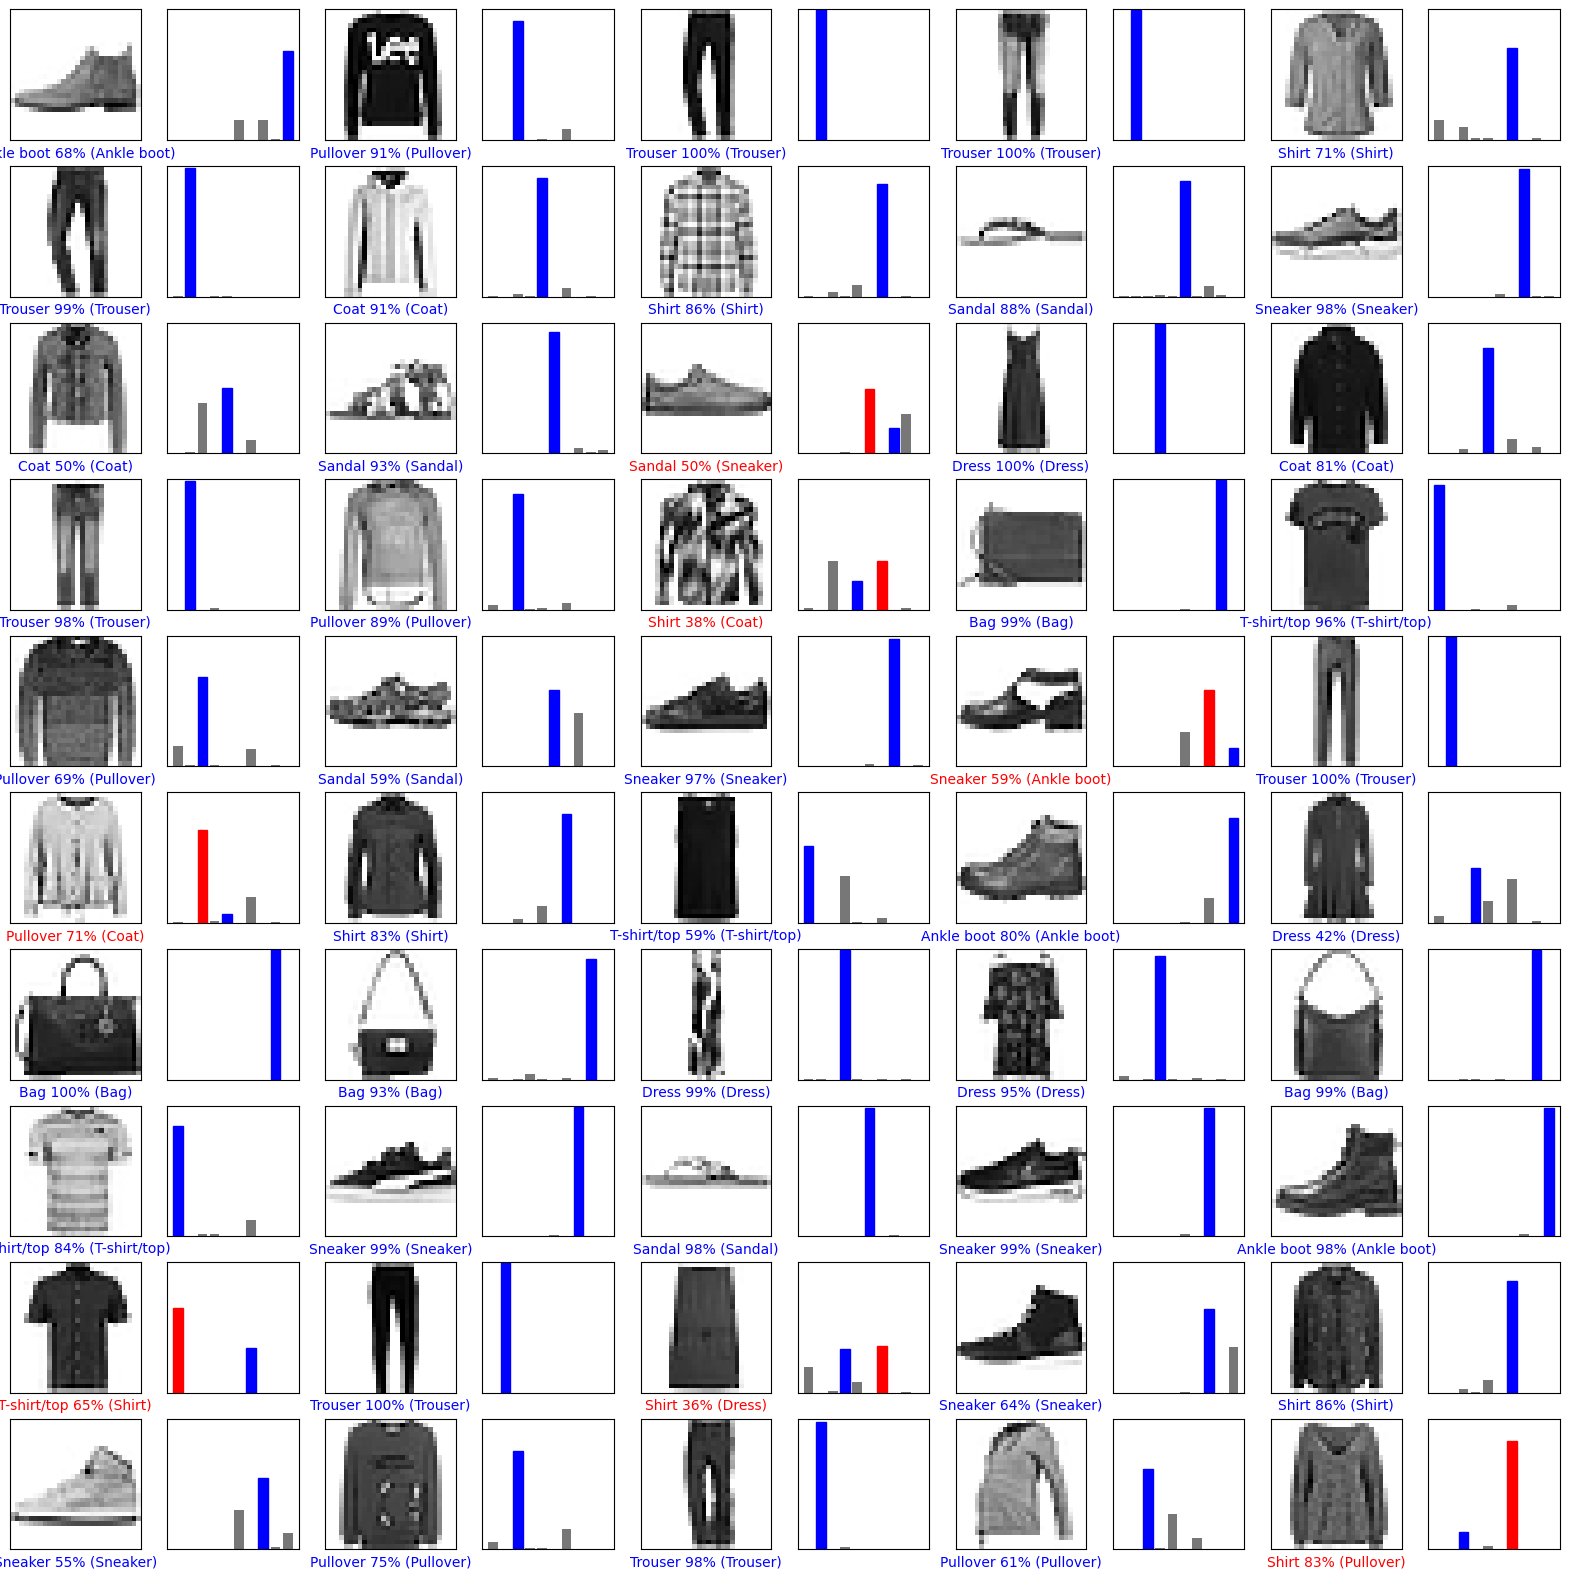

In [109]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images_orig)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [110]:
def findErrors(predictions, answers):
  errors = []
  for i, el in enumerate(predictions):
    if np.argmax(el) != answers[i]:
      errors.append(i)
  return errors

In [111]:
badClothes = findErrors(predictions, test_labels)
len(badClothes)

1538

In [112]:
len(test_labels), test_acc, 1 - len(badClothes)/len(test_labels)

(10000, 0.8461999893188477, 0.8462000000000001)

In [113]:
badClothes[:5] # these are indexes in our predictions where the TOP prediction is wrong

[12, 17, 23, 25, 40]

In [114]:
# let's collect the bad clothes in bad_items and bad_items_true_labels
bad_items = []
bad_items_true_labels = []
bad_predictions = []
for i in badClothes:
  bad_items.append(test_images_orig[i])
  bad_items_true_labels.append(test_labels[i])
  bad_predictions.append(predictions[i])

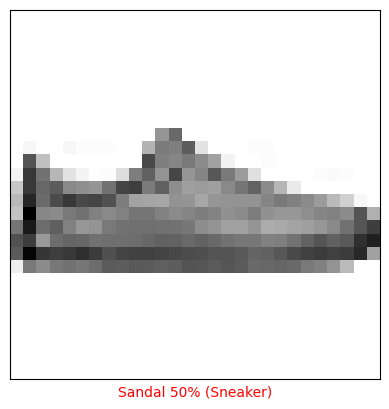

In [115]:
# let's plot first bad_image
plot_image(0, bad_predictions, bad_items_true_labels, bad_items)


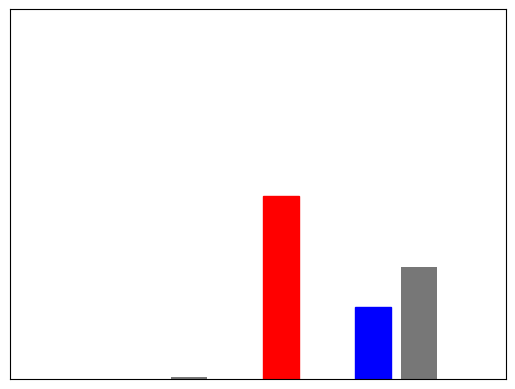

In [116]:
plot_value_array(0, bad_predictions, bad_items_true_labels)

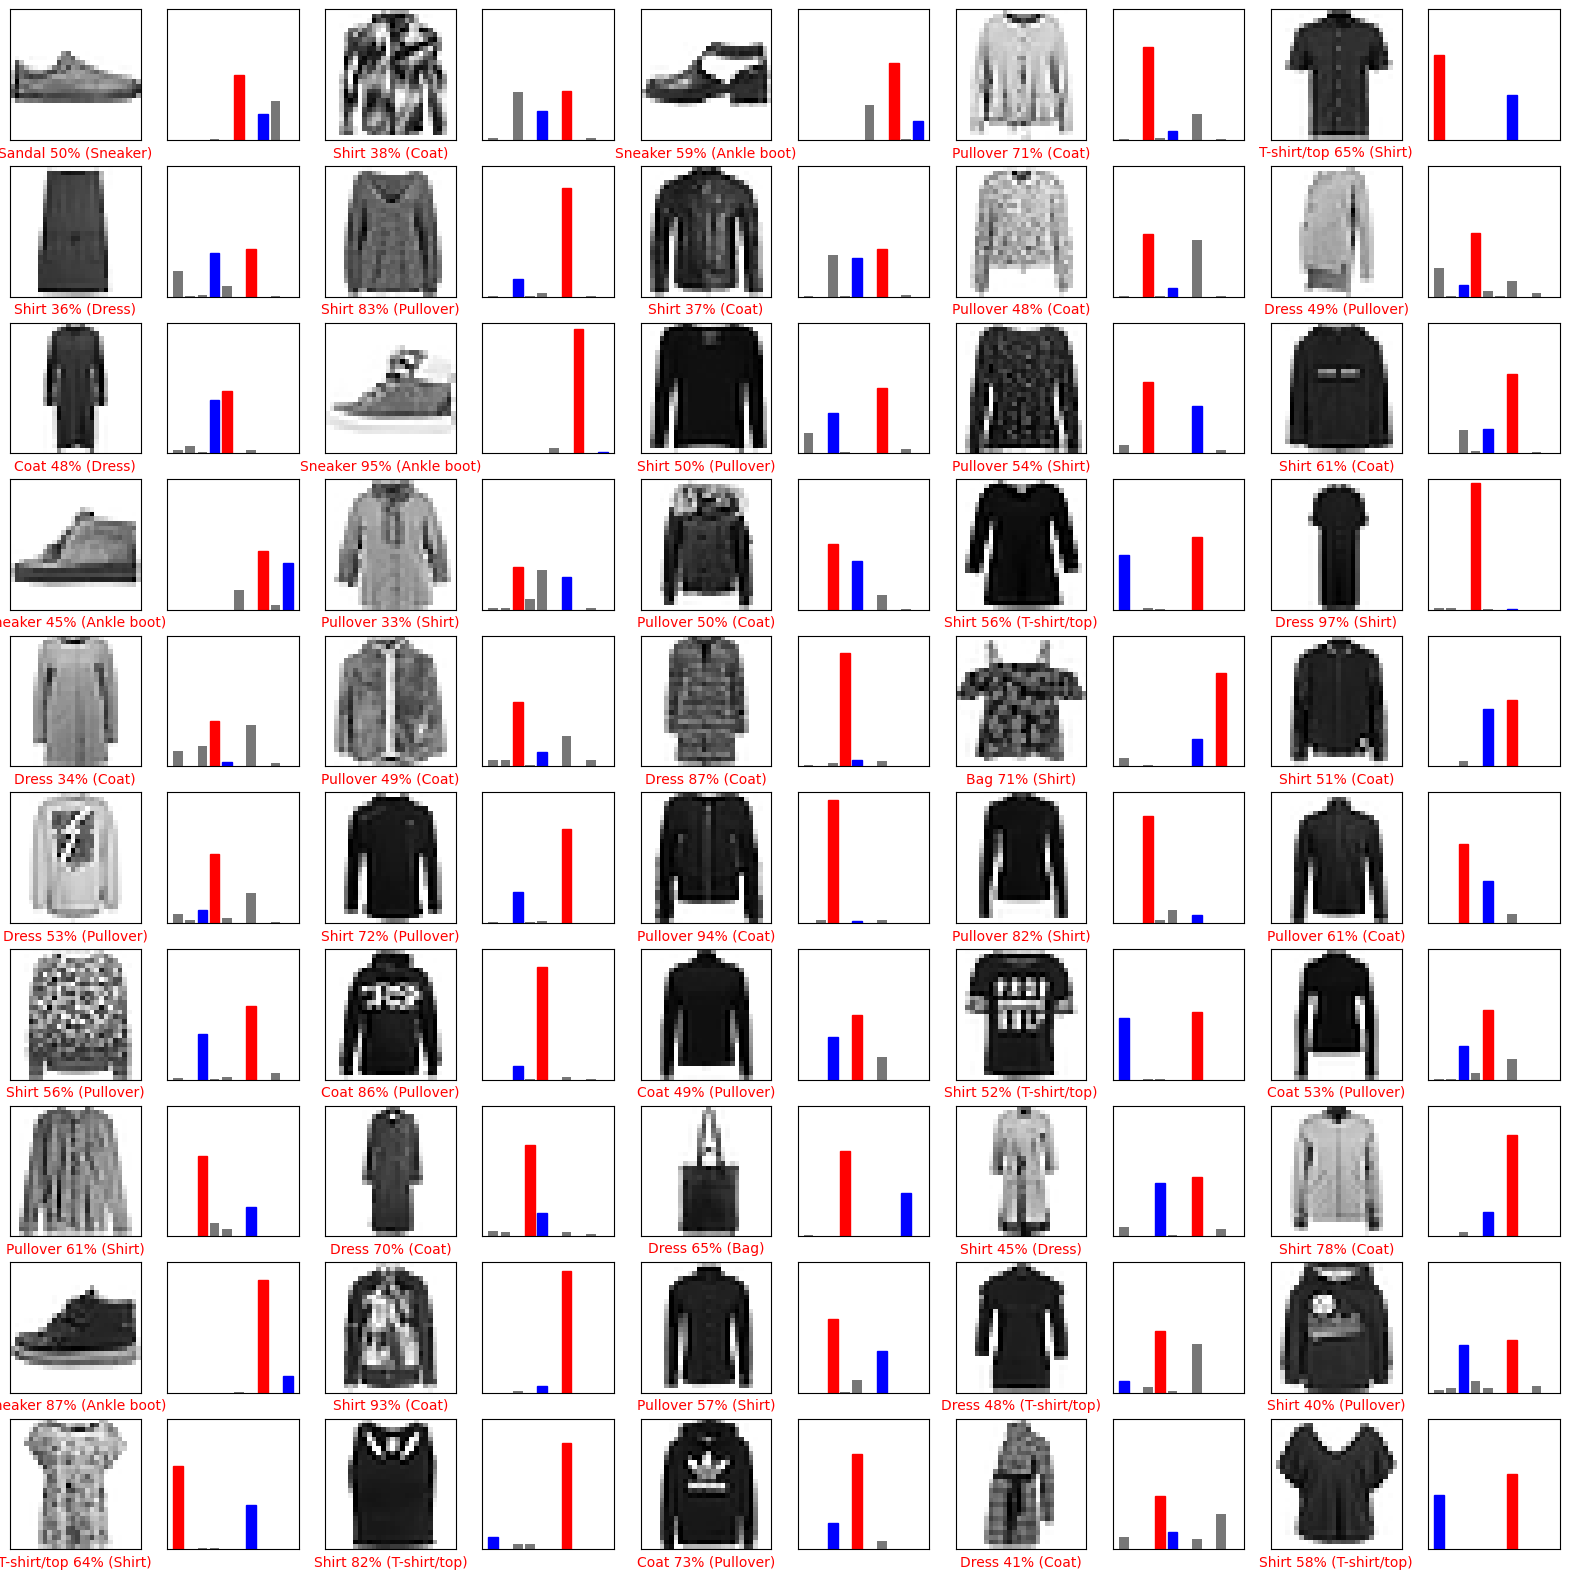

In [117]:
# let's plot first 5 of the bad items along with the distribution of their guesses
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, bad_predictions, bad_items_true_labels, bad_items)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, bad_predictions, bad_items_true_labels)



## 6. Convolutional neural network

Convolutional neural networks are better suited for image recognition

In [118]:
# Load data
dset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dset.load_data()
test_images_orig = test_images
# what changes we shape back the images into 60k, 28x28, and 1 single dimensions
# we need to do this because the convolutional network functions
# could work also on color data then you would not have 1 but 3
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)
train_images = train_images / 255
test_images = test_images / 255

In [119]:
np.max(train_images)

np.float64(1.0)

In [120]:
train_images.shape # so the extra 1 signifies that we the last entry is not a scalar but a vector with a single value

(60000, 28, 28, 1)

In [122]:
# Create and train model, and obtain predictions
model = keras.Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
# actual work is done here, this can be slow, note we will try only 3 epochs
model.fit(train_images, train_labels_cat,
              batch_size=32, epochs=3, verbose=1)
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print('Test accuracy:', test_acc)
predictions = model.predict(test_images)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 51ms/step - accuracy: 0.7642 - loss: 0.6653
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 49ms/step - accuracy: 0.8787 - loss: 0.3407
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 50ms/step - accuracy: 0.8980 - loss: 0.2872
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9022 - loss: 0.2622
Test accuracy: 0.9020000100135803
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


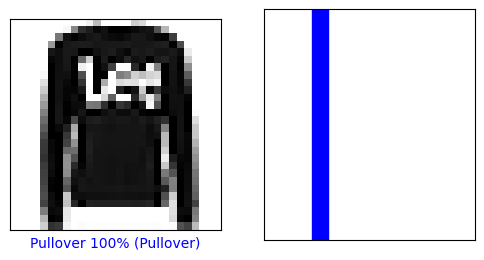

In [123]:
# Plot one prediction
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images_orig)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

In [124]:
badclothes = findErrors(predictions, test_labels)
len(badclothes)

980

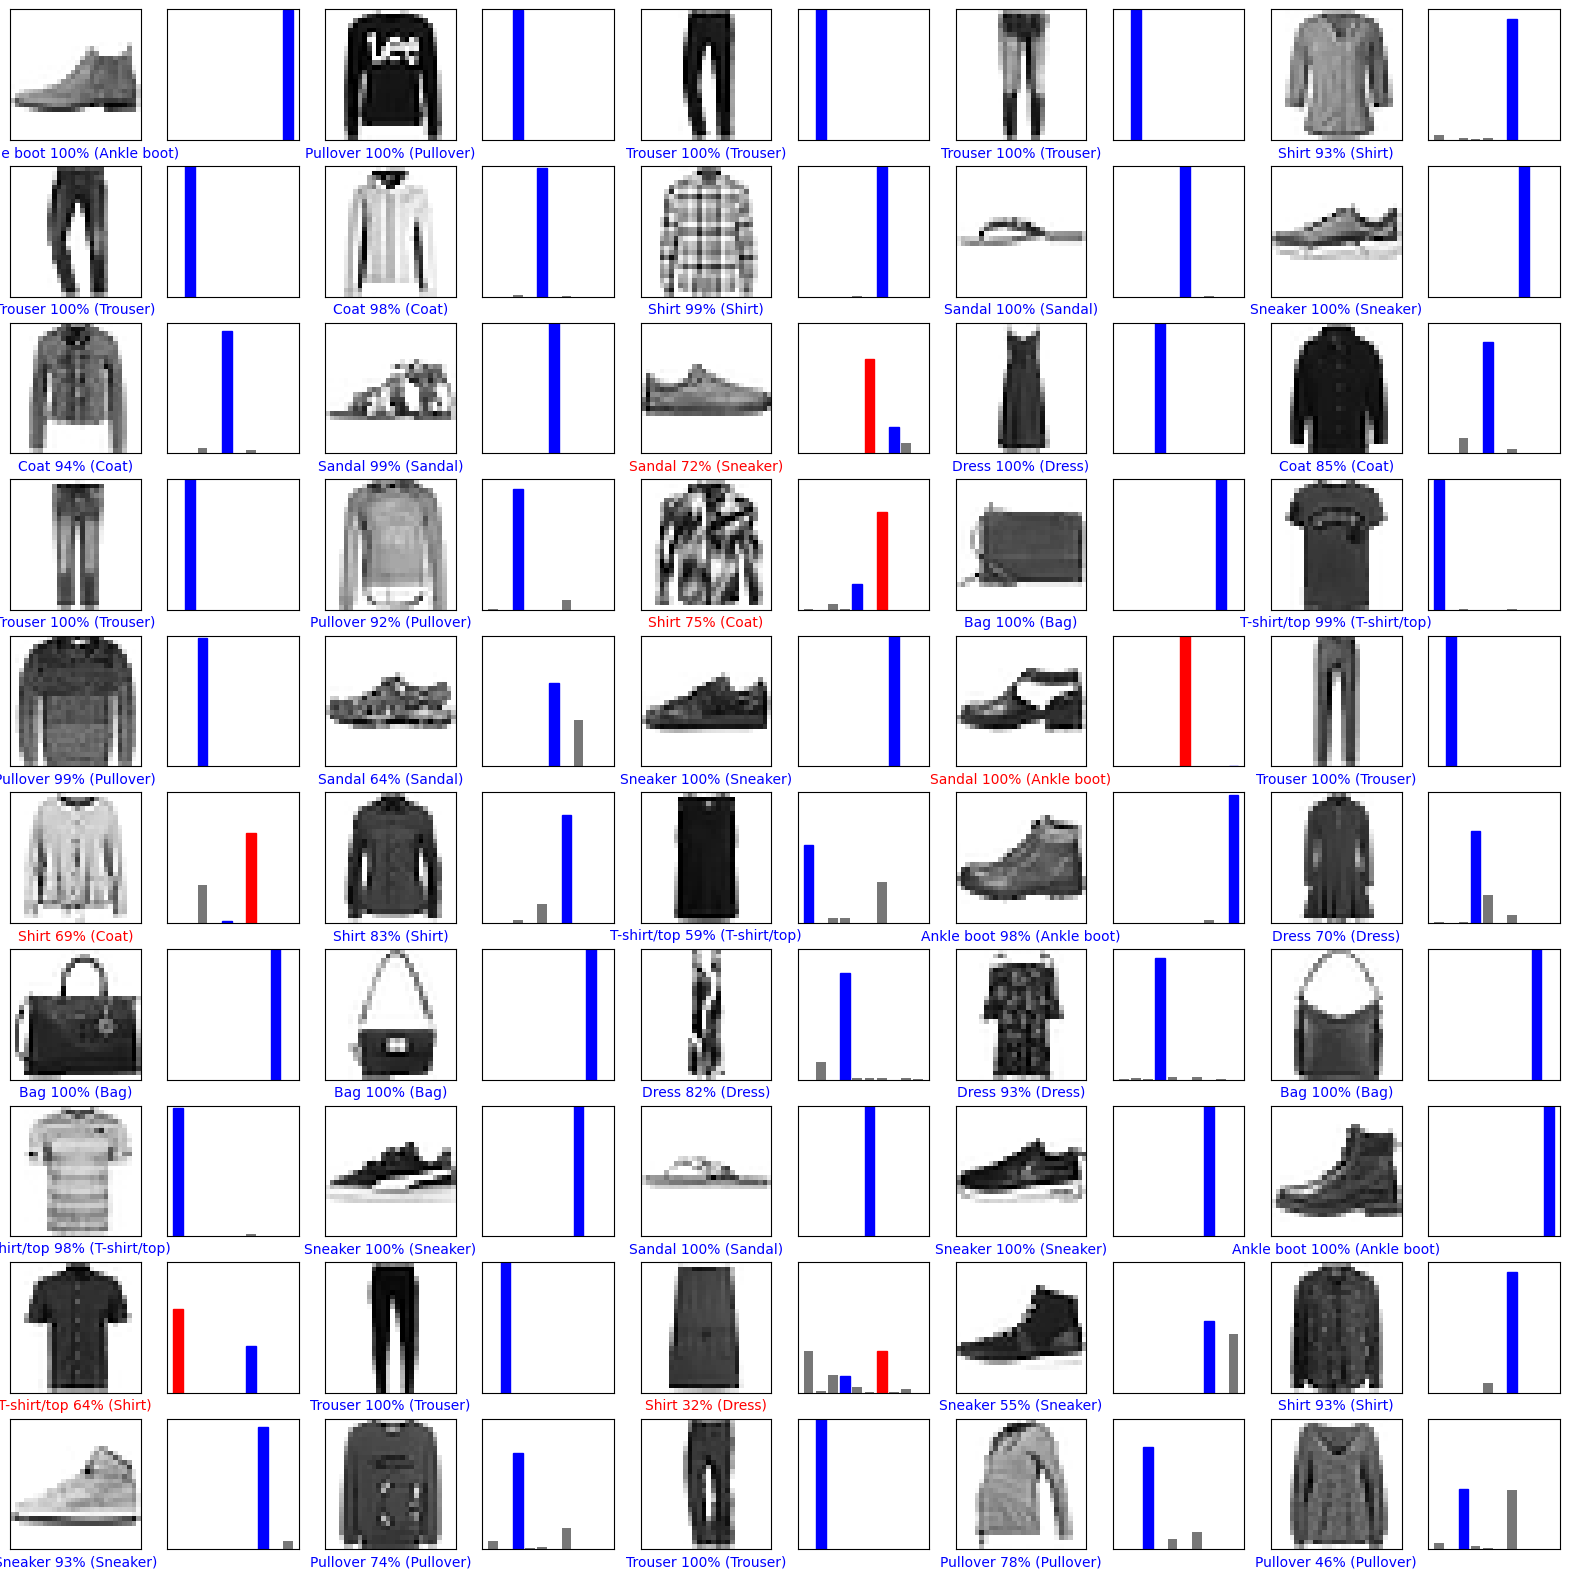

In [125]:
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images_orig)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [126]:
def plotFromIndex(index):
  # Plot the first X test images, their predicted label, and the true label
  # Color correct predictions in blue, incorrect predictions in red
  num_rows = 10
  num_cols = 5
  num_images = num_rows*num_cols # This sets the maximum number of images to plot to 50
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(min(len(index), num_images)): # Loop only up to num_images or the length of the index if smaller
      ndx = index[i]
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(ndx, predictions, test_labels, test_images_orig)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(ndx, predictions, test_labels)

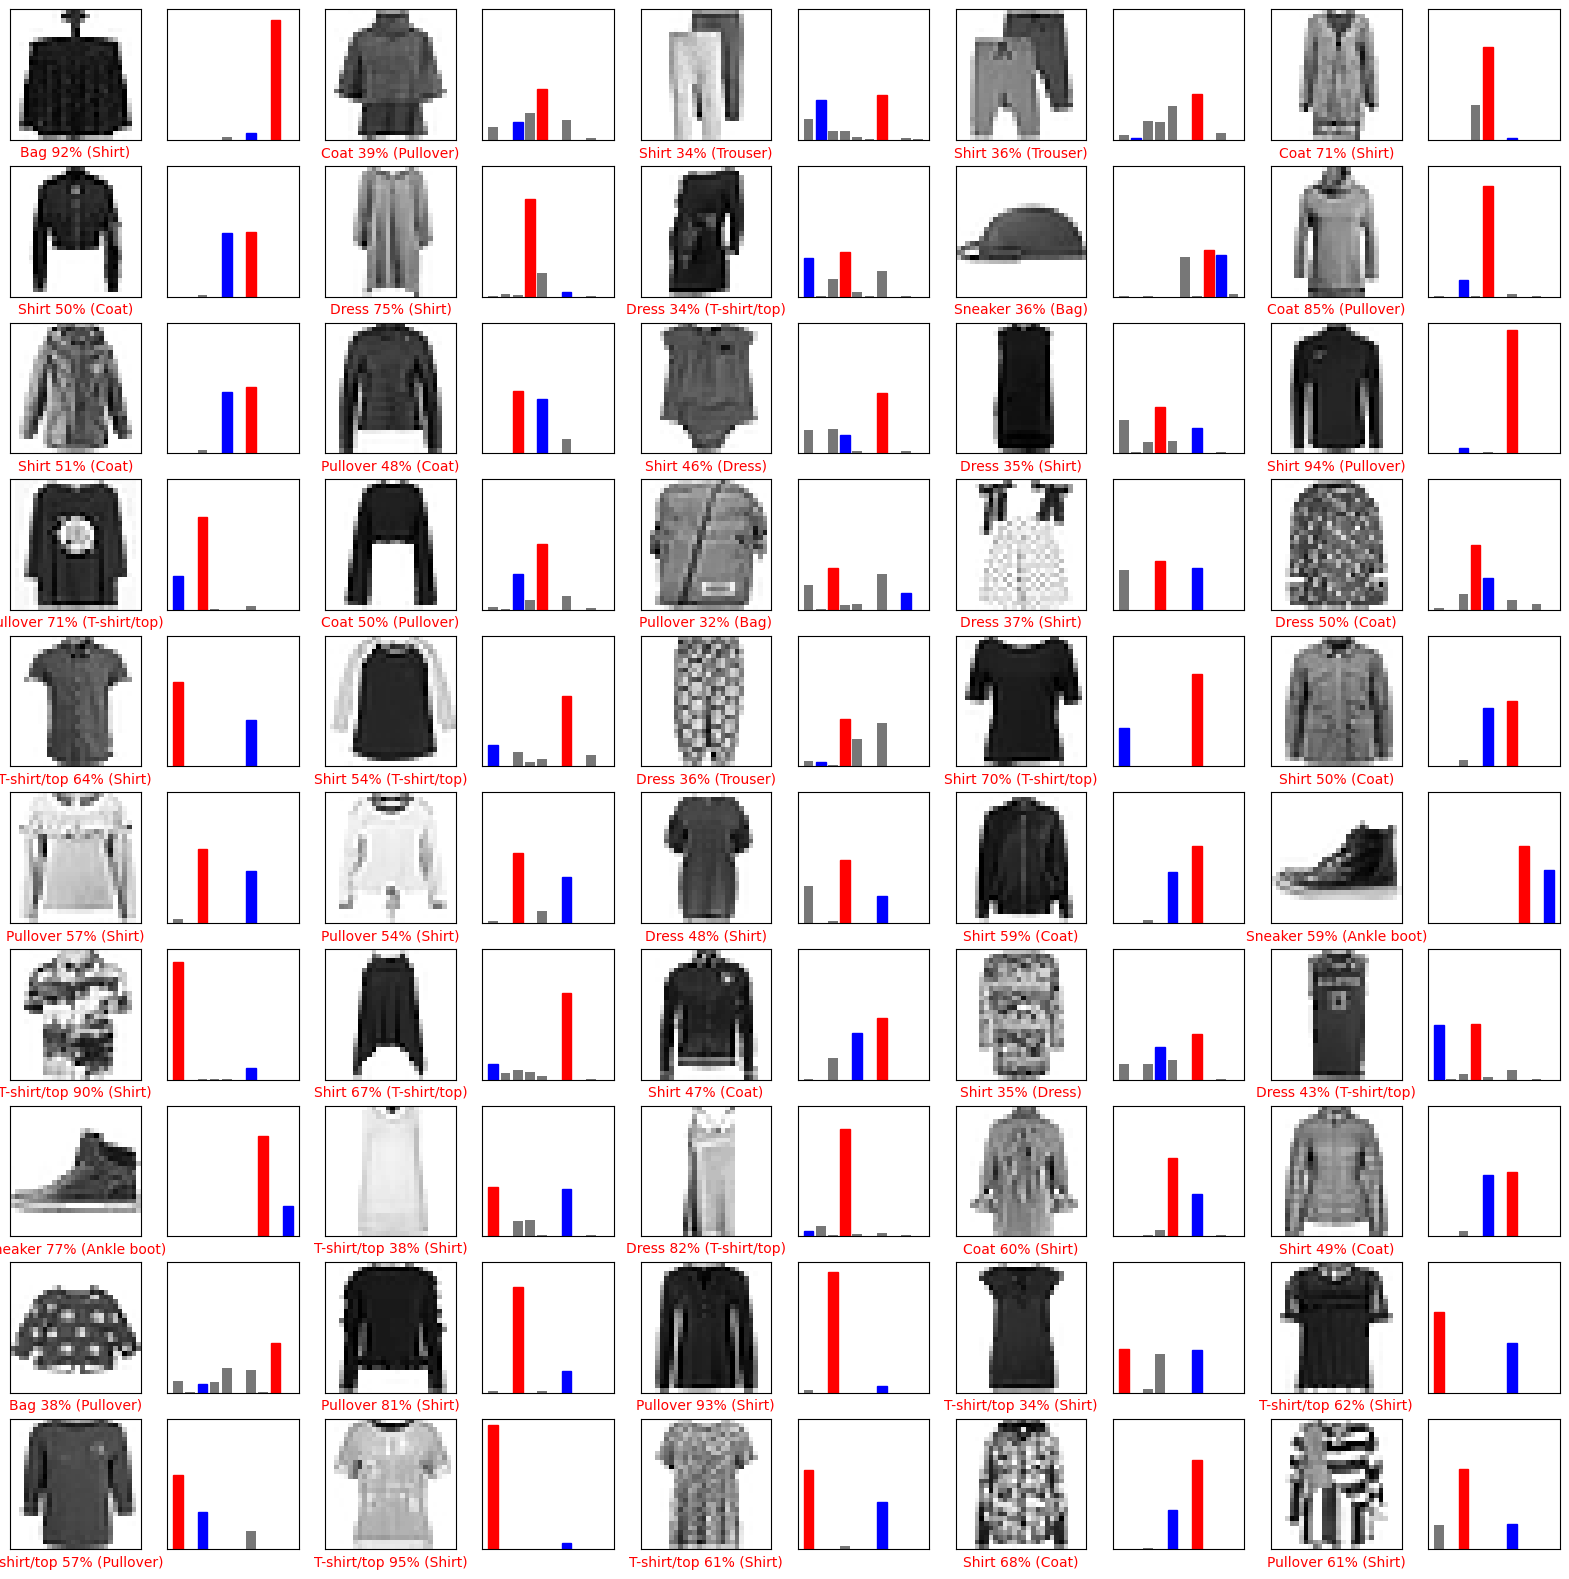

In [127]:
plotFromIndex(badclothes[-50:])

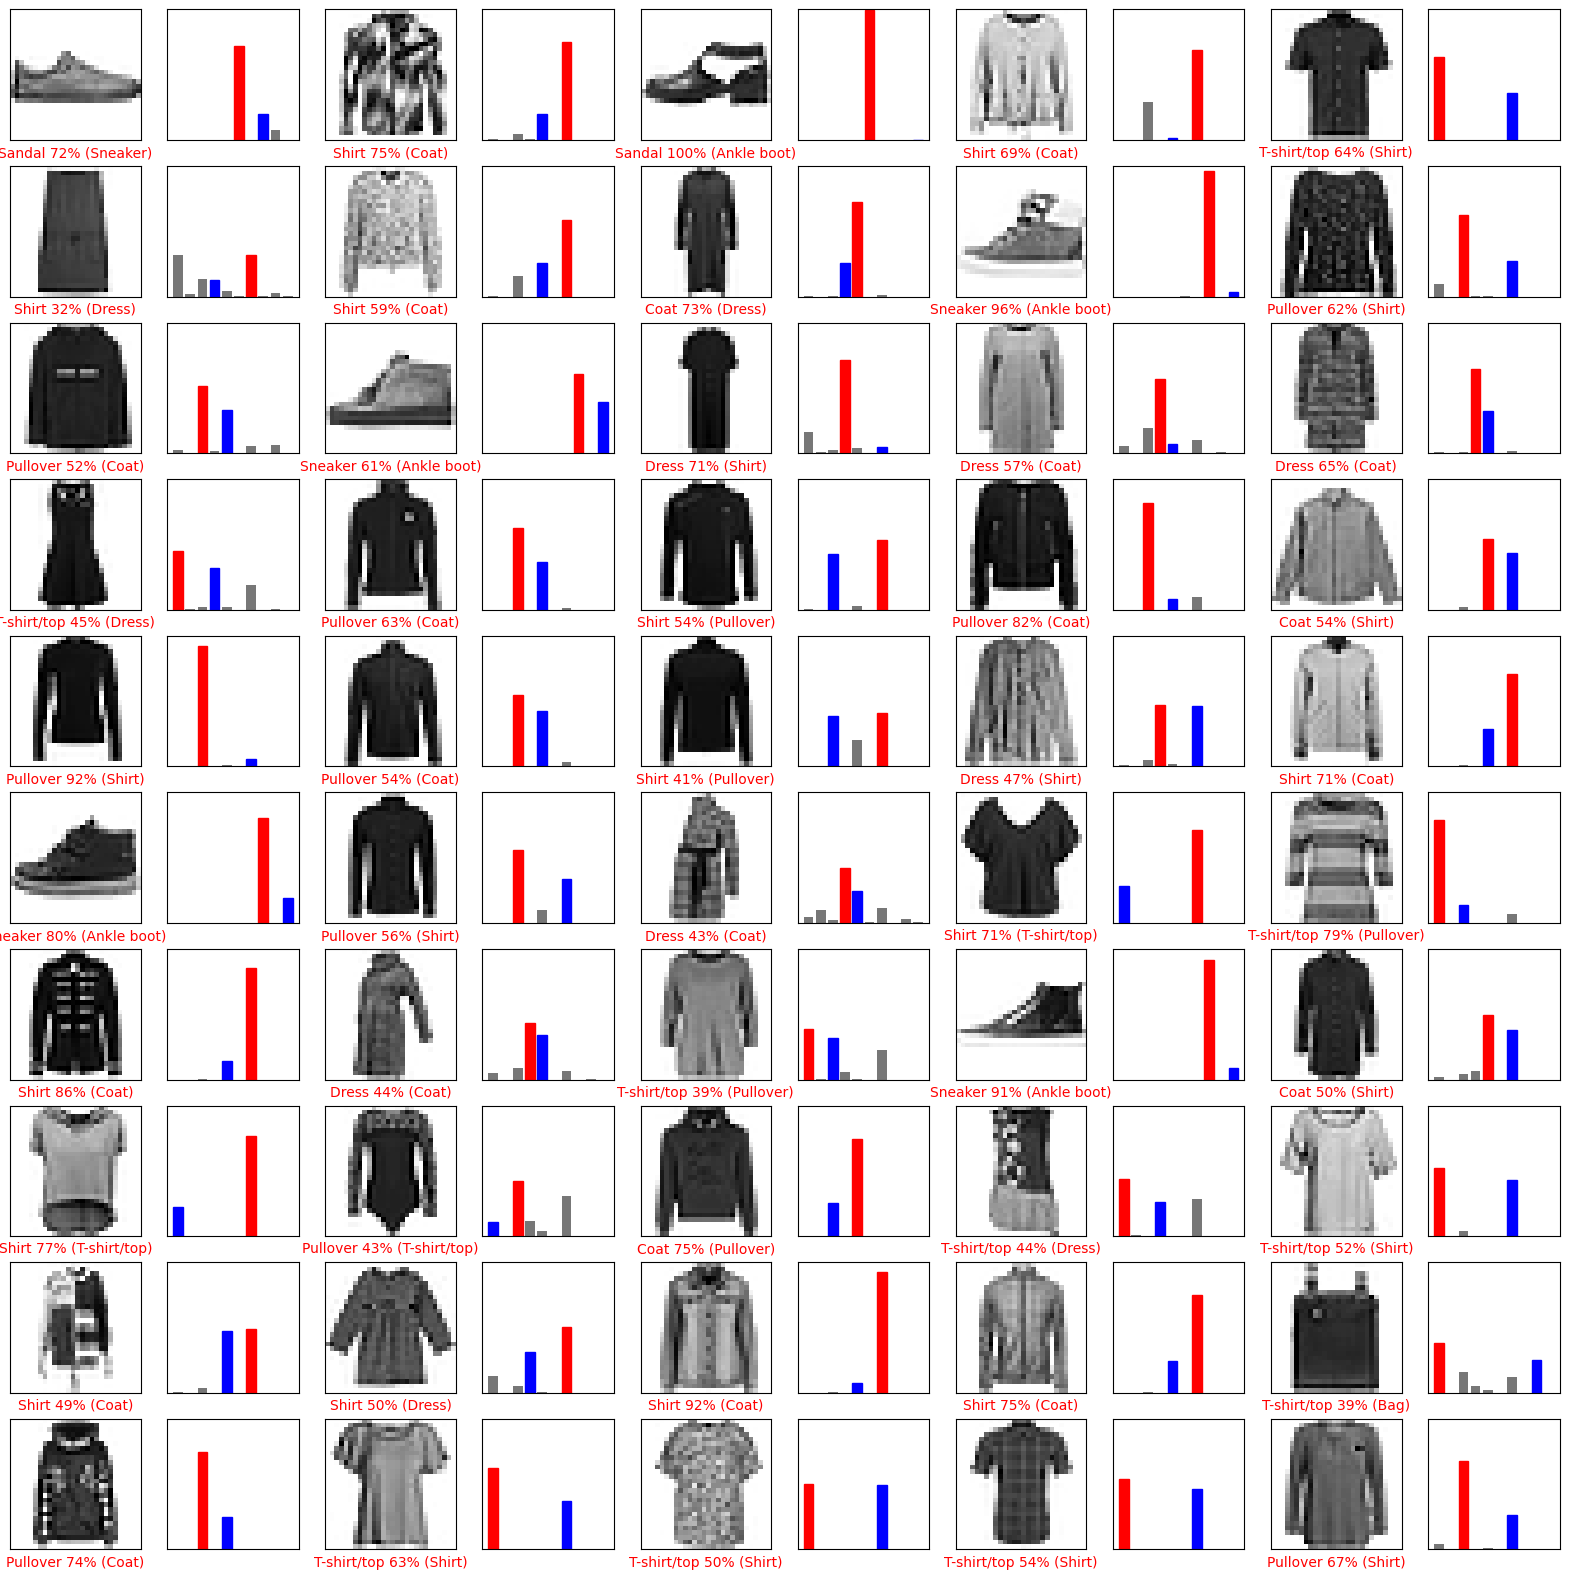

In [128]:
# let's see the first 50 bad clothes
plotFromIndex(badclothes[:50])

In [129]:
# let's see what the first badclothes
badclothes[0]

12

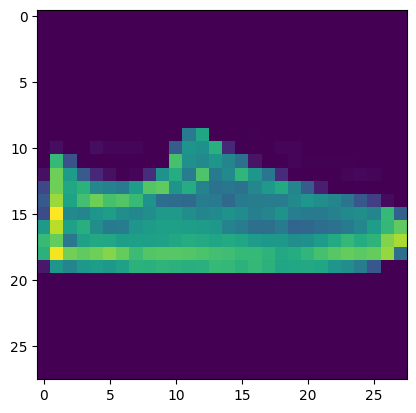

In [130]:
# let's see the image for badclothes[0]
plt.imshow(test_images_orig[badclothes[0]])

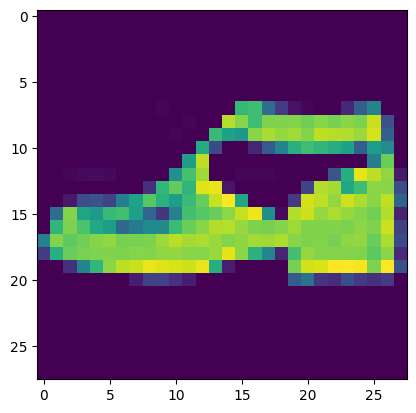

In [ ]:
# how about second?
plt.imshow(test_images_orig[badclothes[1]])

In [131]:
# let's save the second image into a png file
# let's use grayscale
plt.imsave('second.png', test_images_orig[badclothes[1]], cmap='gray')

In [ ]:
# let's save the first 10 images from indexes of badclothes as png 28x28 files
